In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_pickle("../data/preprocess_train.pkl")
df.head()

,id,keyword,location,text,target,text_clean,text_token,text_final,pos_tags,wordnet_tag,lemmatize,text_lemma,char_count1,char_count2,word_count1,word_count2,mword_leng1,mword_leng2
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[(deeds, NNS), (reason, NN), (earthquake, NN),...","[(deeds, n), (reason, n), (earthquake, n), (ma...","[deed, reason, earthquake, may, allah, forgive...",deed reason earthquake may allah forgive u,68,42,13,7,4.307692,5.142857
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[(forest, JJS), (fire, NN), (near, IN), (la, J...","[(forest, a), (fire, n), (near, n), (la, a), (...","[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada,37,37,7,7,4.428571,4.428571
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[(residents, NNS), (asked, VBD), (shelter, JJ)...","[(residents, n), (asked, v), (shelter, a), (pl...","[resident, ask, shelter, place, notify, office...",resident ask shelter place notify officer evac...,130,79,22,11,4.954545,6.272727
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[(13000, CD), (people, NNS), (receive, JJ), (w...","[(13000, n), (people, n), (receive, a), (wildf...","[13000, people, receive, wildfire, evacuation,...",13000 people receive wildfire evacuation order...,63,57,8,7,6.875000,7.285714
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[(got, VBD), (sent, JJ), (photo, NN), (ruby, N...","[(got, v), (sent, a), (photo, n), (ruby, n), (...","[get, sent, photo, ruby, alaska, smoke, wildfi...",get sent photo ruby alaska smoke wildfires pou...,86,54,16,9,4.375000,5.111111


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           7613 non-null   int64  
 1   keyword      7552 non-null   object 
 2   location     5080 non-null   object 
 3   text         7613 non-null   object 
 4   target       7613 non-null   int64  
 5   text_clean   7613 non-null   object 
 6   text_token   7613 non-null   object 
 7   text_final   7613 non-null   object 
 8   pos_tags     7613 non-null   object 
 9   wordnet_tag  7613 non-null   object 
 10  lemmatize    7613 non-null   object 
 11  text_lemma   7613 non-null   object 
 12  char_count1  7613 non-null   int64  
 13  char_count2  7613 non-null   int64  
 14  word_count1  7613 non-null   int64  
 15  word_count2  7613 non-null   int64  
 16  mword_leng1  7613 non-null   float64
 17  mword_leng2  7613 non-null   float64
dtypes: float64(2), int64(6), object(10)
memory usage

In [2]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

/Users/xuxu/neuefische/NLPower-capstone-project/.venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
from sklearn.model_selection import train_test_split
RSEED = 42

X_train, X_test, y_train, y_test = train_test_split(df['text_clean'], df['target'], test_size=0.2, random_state=RSEED)

In [6]:
from datasets.dataset_dict import DatasetDict
from datasets import Dataset
dd = {'train':Dataset.from_dict({'text':X_train,'label':y_train}),
        'test':Dataset.from_dict({'text':X_test,'label':y_test})
       }
data = DatasetDict(dd)

In [7]:
data.shape

{'train': (6090, 2), 'test': (1523, 2)}

In [8]:
type(data)

datasets.dataset_dict.DatasetDict

In [9]:
data['train'][0]

{'text': 'Courageous and honest analysis of need to use Atomic Bomb in 1945 Hiroshima70 Japanese military refused surrender ',
 'label': 1}

In [10]:
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

In [11]:
tokenized_tweet = data.map(preprocess_function, batched=True)

100%|██████████| 2/2 [00:00<00:00, 71.07ba/s]


In [12]:
tokenized_tweet.shape

{'train': (6090, 4), 'test': (1523, 4)}

In [13]:
tokenized_tweet['train'][0]

{'text': 'Courageous and honest analysis of need to use Atomic Bomb in 1945 Hiroshima70 Japanese military refused surrender ',
 'label': 1,
 'input_ids': [101,
  26103,
  1998,
  7481,
  4106,
  1997,
  2342,
  2000,
  2224,
  9593,
  5968,
  1999,
  3386,
  20168,
  19841,
  2887,
  2510,
  4188,
  7806,
  102],
 'attention_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1]}

In [14]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")

In [15]:
tf_train_set = tokenized_tweet["train"].to_tf_dataset(
    columns=["attention_mask", "input_ids"],
    label_cols=["labels"],
    shuffle=True,
    batch_size=16,
    collate_fn=data_collator,
)

tf_validation_set = tokenized_tweet["test"].to_tf_dataset(
    columns=["attention_mask", "input_ids"],
    label_cols=["labels"],
    shuffle=False,
    batch_size=16,
    collate_fn=data_collator,
)

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-07-27 01:50:07.031460: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-27 01:50:07.031546: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [16]:
tf_validation_set

<PrefetchDataset element_spec=({'input_ids': TensorSpec(shape=(None, None), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, None), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [17]:
from transformers import create_optimizer
import tensorflow as tf

batch_size = 16
num_epochs = 5
batches_per_epoch = len(tokenized_tweet["train"]) // batch_size
total_train_steps = int(batches_per_epoch * num_epochs)
optimizer, schedule = create_optimizer(init_lr=2e-5, num_warmup_steps=0, num_train_steps=total_train_steps)

In [18]:
from transformers import TFAutoModelForSequenceClassification

model_bert = TFAutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
model = TFAutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier', 'pre_classifier', 'dropout_19']
You should probably TRAIN this model on a down-stream task to be able to use i

In [19]:
import tensorflow as tf

model_bert.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics=tf.metrics.SparseCategoricalAccuracy())

In [20]:
history = model_bert.fit(x=tf_train_set, validation_data=tf_validation_set, epochs=2)

Epoch 1/2


2022-07-27 01:50:10.918984: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-27 01:50:15.438655: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


381/381 [==============================] - ETA: 0s - loss: 0.4424 - sparse_categorical_accuracy: 0.8094

2022-07-27 02:33:41.833130: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


381/381 [==============================] - 2943s 8s/step - loss: 0.4424 - sparse_categorical_accuracy: 0.8094 - val_loss: 0.4141 - val_sparse_categorical_accuracy: 0.8194
Epoch 2/2
381/381 [==============================] - 10630s 28s/step - loss: 0.3284 - sparse_categorical_accuracy: 0.8663 - val_loss: 0.4040 - val_sparse_categorical_accuracy: 0.8345


In [21]:
history.history

{'loss': [0.44244661927223206, 0.3283926844596863],
 'sparse_categorical_accuracy': [0.8093596696853638, 0.866338312625885],
 'val_loss': [0.41410982608795166, 0.4040098190307617],
 'val_sparse_categorical_accuracy': [0.8194353580474854, 0.8345370888710022]}

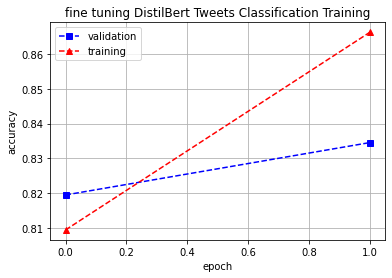

In [22]:
import matplotlib.pyplot as plt

df_history = pd.DataFrame(history.history)
fig,ax = plt.subplots()
plt.plot(range(df_history.shape[0]),df_history['val_sparse_categorical_accuracy'],'bs--',label='validation')
plt.plot(range(df_history.shape[0]),df_history['sparse_categorical_accuracy'],'r^--',label='training')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('fine tuning DistilBert Tweets Classification Training')
plt.legend(loc='best')
plt.grid()
plt.show()

fig.savefig('../images/finetuning_Convergence.png', format='png')

In [25]:
model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics=tf.metrics.SparseCategoricalAccuracy())

In [27]:
history2 = model.fit(x=tf_train_set, validation_data=tf_validation_set, epochs=3)

Epoch 1/3


2022-07-27 08:33:26.924554: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


381/381 [==============================] - ETA: 0s - loss: 0.4246 - sparse_categorical_accuracy: 0.8167

2022-07-27 09:09:31.687756: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


381/381 [==============================] - 2253s 6s/step - loss: 0.4246 - sparse_categorical_accuracy: 0.8167 - val_loss: 0.3944 - val_sparse_categorical_accuracy: 0.8339
Epoch 2/3
381/381 [==============================] - 3599s 9s/step - loss: 0.3038 - sparse_categorical_accuracy: 0.8805 - val_loss: 0.4078 - val_sparse_categorical_accuracy: 0.8345
Epoch 3/3
381/381 [==============================] - 4798s 13s/step - loss: 0.2526 - sparse_categorical_accuracy: 0.9062 - val_loss: 0.4267 - val_sparse_categorical_accuracy: 0.8286


In [ ]:
input_text = ["I need help to get out the trap"]
input_text_tokenized = tokenizer.encode(input_text,
                                        truncation=True,
                                        return_tensors="tf")

In [24]:
pred_label = model_bert(input_text_tokenized)
pre_log = pred_label[0]
pre_probs = tf.nn.softmax(pre_log, axis=1).numpy()
print(f'The prediction probs are: {pre_probs}')

The prediction probs are: [[0.9209457  0.07905429]]
